<h1 style="text-align:center; text-decoration:underline;">Réaliser une ACP avec Python : principes et implémentation</h1>

## Qu'est-ce que l'ACP ?

L'ACP (analyse en composante principale) est un technique d'analyse qui permet d'analyser la liaison entre plusieurs variables quantitatives en même temps. Quand on a deux variables quantitatives, on utilise naturellement un scatterplot pour visualiser la relation entre ces deux variables. Quand on dépasse un nombre de variables N de 2, on doit alors représenter les données dans un espace à N dimensions. Un tel espace est difficile à appréhender. Dans ce cas, on utilise l'ACP pour passer d'un nuage en N dimensions à un nuage de points en deux dimensions.
L'idée est de construire des axes factoriels, sur lesquels on va projeter les observations et les variables. Les axes factoriels sont perpendiculaires entre eux, avec le second qui est construit perpendiculairement au premier. Les axes identifiés sont ceux pour lesquels les nuages de points sont les plus dispersés.

L'analyse en composante principale dresse ainsi deux cartes :
- une qui permet de localiser les individus les uns par rapport aux autres,
- une autre qui permet de localiser les variables, les unes par rapport aux autres. C'est uen carte de corrélation entre les variables.

Ainsi, l'ensemble des deux cartes permet d'identifier la structure de la population par rapport aux variables et aux interactions entre celles-ci.

Les objectifs de l'ACP :
- identifier les individus similaires par rapport aux variables,
- identifier les individus différents par rapport aux variables,
- identifier les individus ayant un comportement "atypique" par rapport aux variables,
- réduire, si possible, le nombre de variable.

Il existe 3 types d'ACP :
- l'ACP "normale" : utile lorsque le 0 a un sens. Par exemple, dans les mesures de température, le 0 à un sens.
- L'ACP centrée : on va retrancher à chaque valeur d'une variable sa moyenne, pour chaque individu. On a recourt à cette méthode quand les variables sont directement comparables (par exemple, l'effectif de la population pour chaque CSP).
- L'ACP normée : "Les variables sont à la fois « centrées » et « réduites ». La réduction (après centrage) consiste à diviser pour chaque observation la valeur de cette variable par son ´ecart-type. Chaque variable possède une moyenne nulle et un écart-type unitaire". C'est la méthode la plus fréquemment utilisée, puisqu'il s'agit de comparer des variables dont les unités sont différentes (Ex: distance, poids, âge etc).

La similarité entre les individus est mesurée à l'aide de la distance euclidienne.
La similarité (liaison) entre les variables est calculée au moyen d'une coefficient de corrélation. Le meilleur test qu'on puisse faire est le test de corrélation linéaire, puisque ce sont des liaisons réputées simples. Dans certains cas, le coefficient de corrélation linéaire se rapproche du coefficient de corrélation d'une relation non linéaire (donc, dans certains cas, un test de Pearson est suffisant) (Duvérier DJIFACK ZEBAZE). De plus, on souhaite une vue d'ensemble sur les variables et non réaliser des tests pair par pair. Dans ce cas : on aura recourt aux composantes principales, qui sont des synthèses des relations entre variables.

Regarder en même temps : 
- L'excellente [vidéo de formation du CoinStat](https://www.youtube.com/watch?v=feaMmwaACF0&list=PLyh35eYRez8e0KxsArawcDm6TYPVq0rU_&index=15)

Sources :
- [Ressources pour l'ACP avec R par Delladata](https://delladata.fr/ressources-pour-acp/)
- [Description simplifiée de l'ACP](https://jonathanlenoir.files.wordpress.com/2013/12/analyse-en-composante-principale-acp.pdf)
- <p><span style="text-decoration:underline;">Statistiques avec Python : de la théorie à la pratique</span> de Duvérier DJIFACK ZEBAZE.</p>

In [1]:
#Import packages

import pandas as pd 
## Lever les limites d'affiche des lignes ...
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None) ## ... puis des colonnes

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Un nouveau package : sklearn, dédié au ML/analyse spatiale.
import sklearn.decomposition as PCA ## ACP
import sklearn.preprocessing as StandardScaler ## normaliser les données.
import scipy.stats as stats

Toutes les étapes de l'ACP. L'ACP repose sur la taille des variables (donc on doit vérifier l'échelle, avoir la même échelle).

In [2]:
# Importation du dataframe
iris=sns.load_dataset("iris") ## Charger le jeu de données iris de seaborn.

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [4]:
type(iris)

pandas.core.frame.DataFrame

In [5]:
## Afficher les dimensions de la table :
iris.shape ## 150 lignes et 5 colonnes

## C'est ce qu'on appelle l'analyse de la dimension de la base.

(150, 5)

In [6]:
## Analyse du type de variable dans la base de données

iris.dtypes ## OK pour les types.

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [7]:
## Analyse de données manquantes

iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

## Analyses descriptives univariées
### Analyses descriptives univariées globales

In [8]:
# Analyse desciptive du jeu de données
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
# Description des variables qualitatives
iris.describe(include="object")

,species
count,150
unique,3
top,setosa
freq,50


<Axes: >

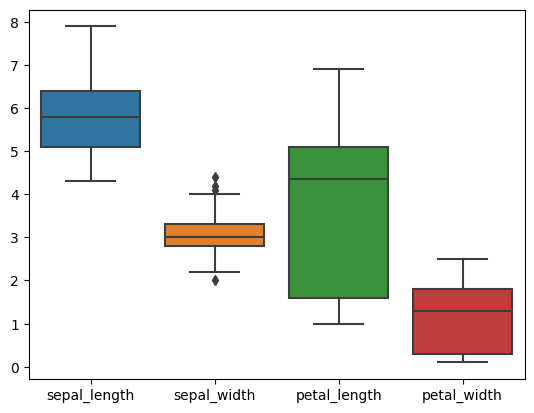

In [10]:
# Analyse descriptive des variables quantitatives
sns.boxplot(data=iris)

### Analyse descriptive univariée - outliers

In [ ]:
## On a visiblement des valeurs extrêmes pour sepal_width.
## On va prendre le temps d'identifier ces valeurs extrêmes :

In [16]:
sepal_width_stats = iris["sepal_width"].describe()
sepal_width_stats

count    150.000000
mean       3.057333
std        0.435866
min        2.000000
25%        2.800000
50%        3.000000
75%        3.300000
max        4.400000
Name: sepal_width, dtype: float64

On rappelle que les outliers sont des valeurs qui se trouvent :
- au-dessus de Q3 + 1.5 * (Q3 - Q1)
- en-dessous de Q1 - 1.5 * (Q3 - Q1)

In [18]:
## Identifier les Q1 et Q3 nécessaires au calcul des bornes hautes et basses du boxplt.
q1 = sepal_width_stats["25%"]
q3 = sepal_width_stats["75%"]

## Puis des valeurs des bornes hautes et basses ...
outq1 = q1 - 1.5 * (q3 - q1)
outq3 = q3 + 1.5 * (q3 - q1)

## ... afin de les utiliser comme valeur de filtre dans le df :
iris[ (iris["sepal_width"] < outq1) | (iris["sepal_width"] > outq3) ] ## ... pour identifier les caractéristiques des outliers.

,sepal_length,sepal_width,petal_length,petal_width,species
15,5.7,4.4,1.5,0.4,setosa
32,5.2,4.1,1.5,0.1,setosa
33,5.5,4.2,1.4,0.2,setosa
60,5.0,2.0,3.5,1.0,versicolor


## Analyse de la normalité

Nécessaire pour les tests paramétriques.

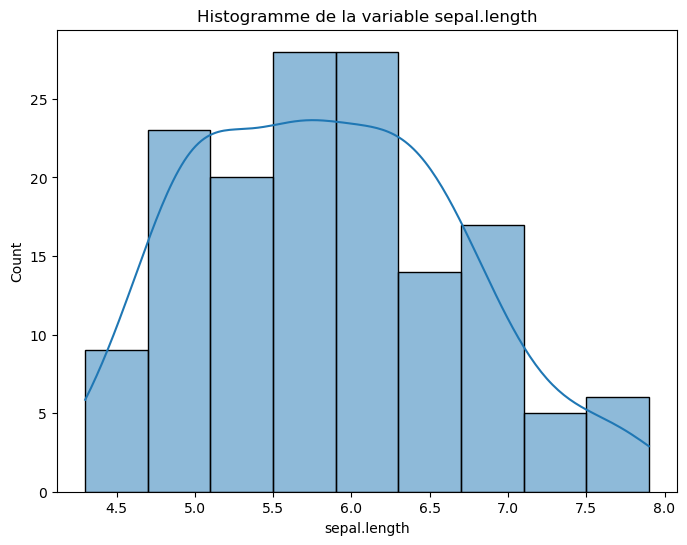

La variable sepal.length suit une loi normale (p-value=0.05682424941067306)


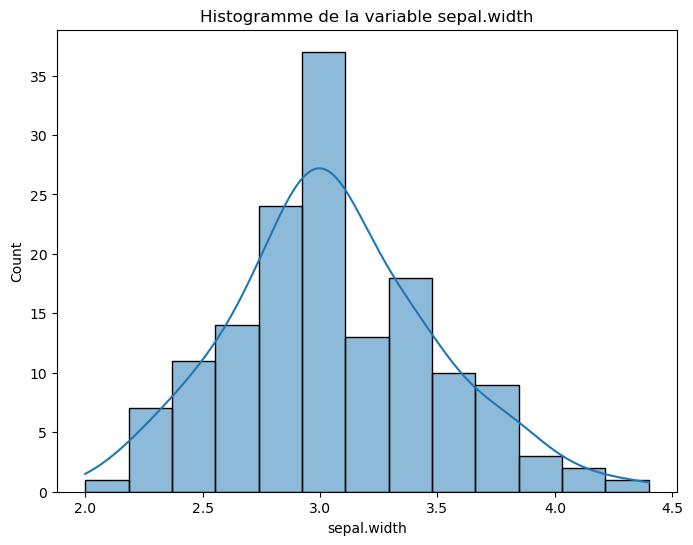

La variable sepal.width suit une loi normale (p-value=0.2097338099298262)


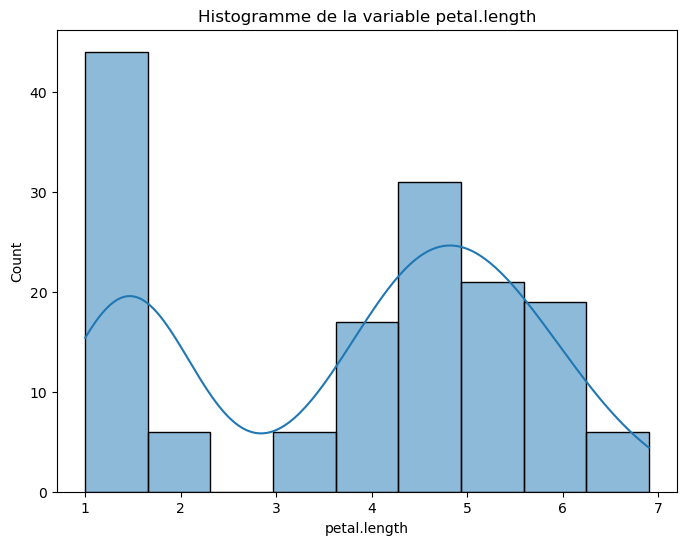

La variable petal.length ne suit pas une loi normale (p-value=7.264667501338673e-49)


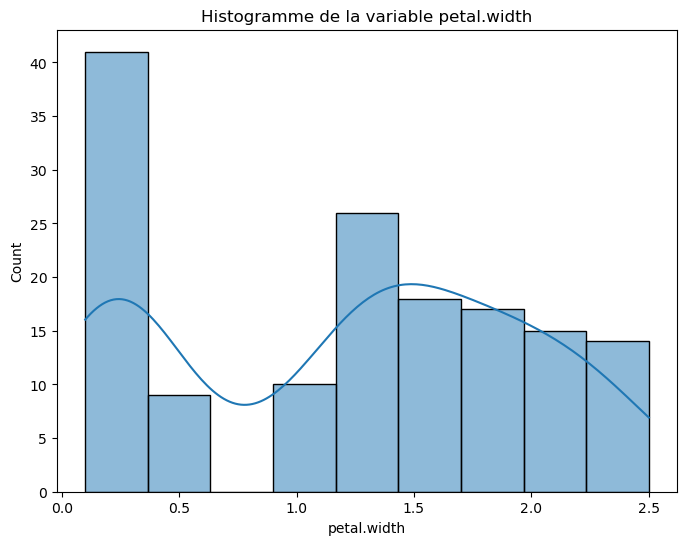

La variable petal.width ne suit pas une loi normale (p-value=1.3492785927137586e-30)


In [9]:
# Création d'un histogramme et d'un test de normalité pour chaque variable
for column in iris.columns[:-1]:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=column, kde=True)
    plt.title(f"Histogramme de la variable {column}")
    plt.show()

    statistic, p_value = stats.normaltest(iris[column])
    if p_value < 0.05:
        print(f"La variable {column} ne suit pas une loi normale (p-value={p_value})")
    else:
        print(f"La variable {column} suit une loi normale (p-value={p_value})")

# Analyse de la variable qualitative

<Axes: xlabel='species', ylabel='count'>

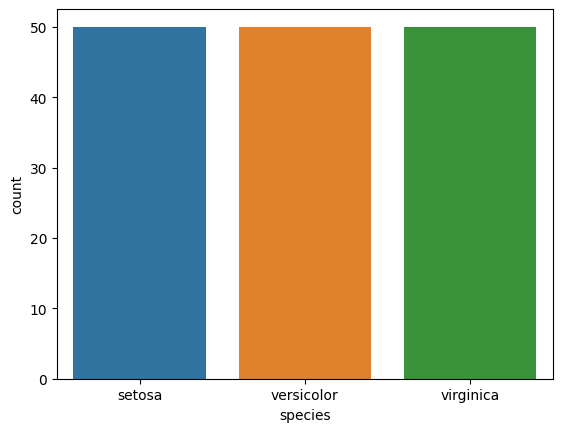

In [21]:
sns.countplot(x=iris['species'])

([<matplotlib.patches.Wedge at 0x2b854280040>,
 [Text(0.5499999702695115, 0.9526279613277875, 'setosa'),
  Text(-1.0999999999999954, -1.0298943258065002e-07, 'versicolor'),
  Text(0.5500001486524352, -0.9526278583383436, 'virginica')])

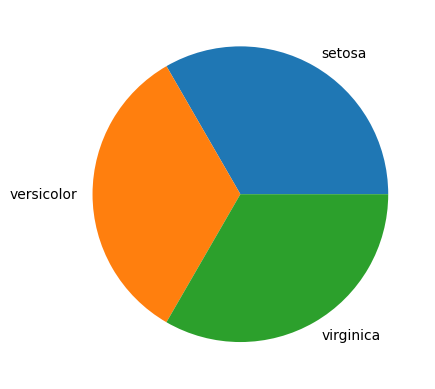

In [24]:
# Création d'un tableau de fréquences pour la variable "species"
freq_table = (iris['species'].value_counts())/len(iris)

freq_table

#Création d'un diagramme circulaire pour le tableua de fréquence

plt.pie(freq_table,labels=freq_table.index)

# Analyse bivariées

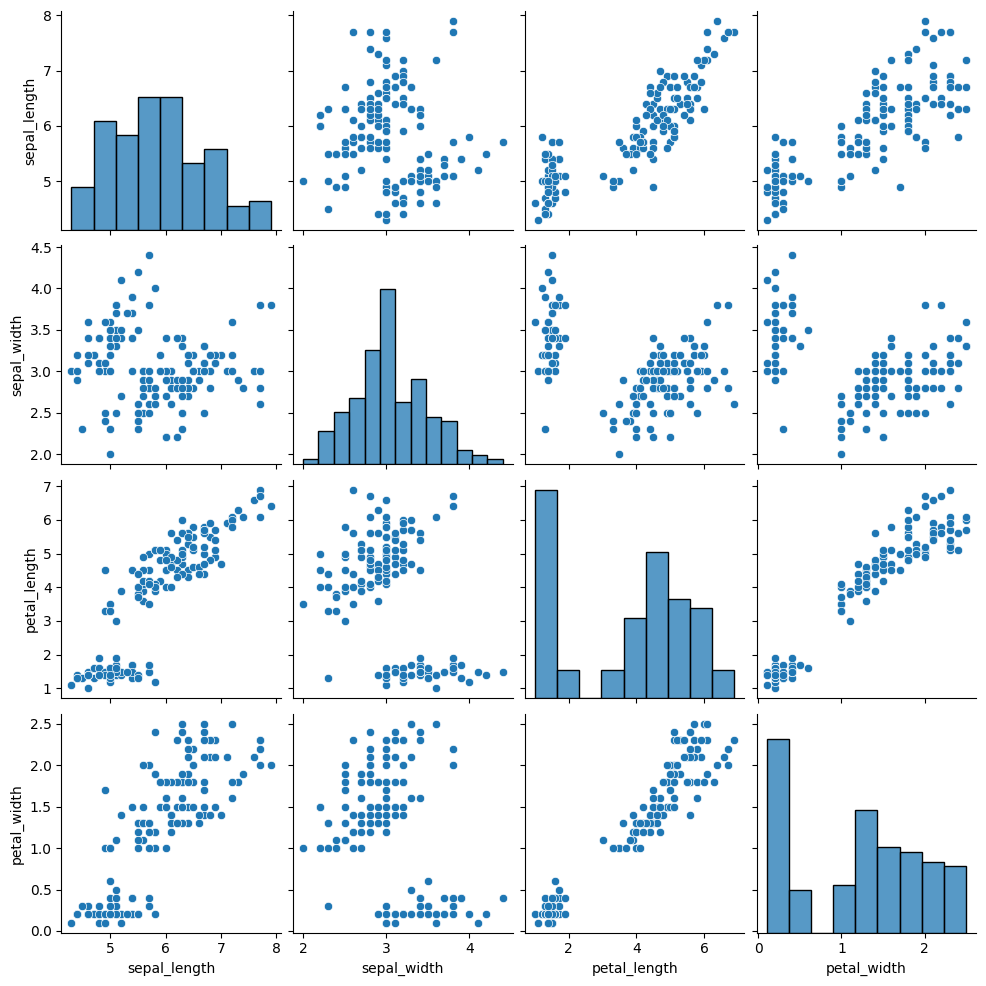

In [25]:
# Relation entre les variables quantitatives
sns.pairplot(iris)

Ces graphiques font émerger des relations linéaires entre largeurs et longueurs des pétales. On va ensuite réaliser une matrice de corrélation qui indique la valeur du coefficient de corrélation.

<Axes: >

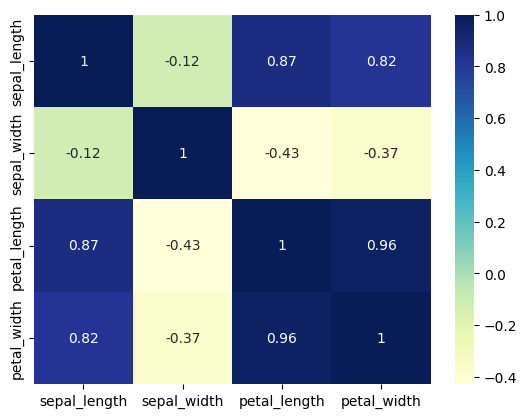

In [27]:
# Obtenir le tableau de corélation et la heatmap

corr_matrix = iris[ ["sepal_length", "sepal_width", "petal_length", "petal_width"] ].corr()

# Calcul des p-values pour chaque paire de variables
sns.heatmap(corr_matrix,annot=True,cmap="YlGnBu")

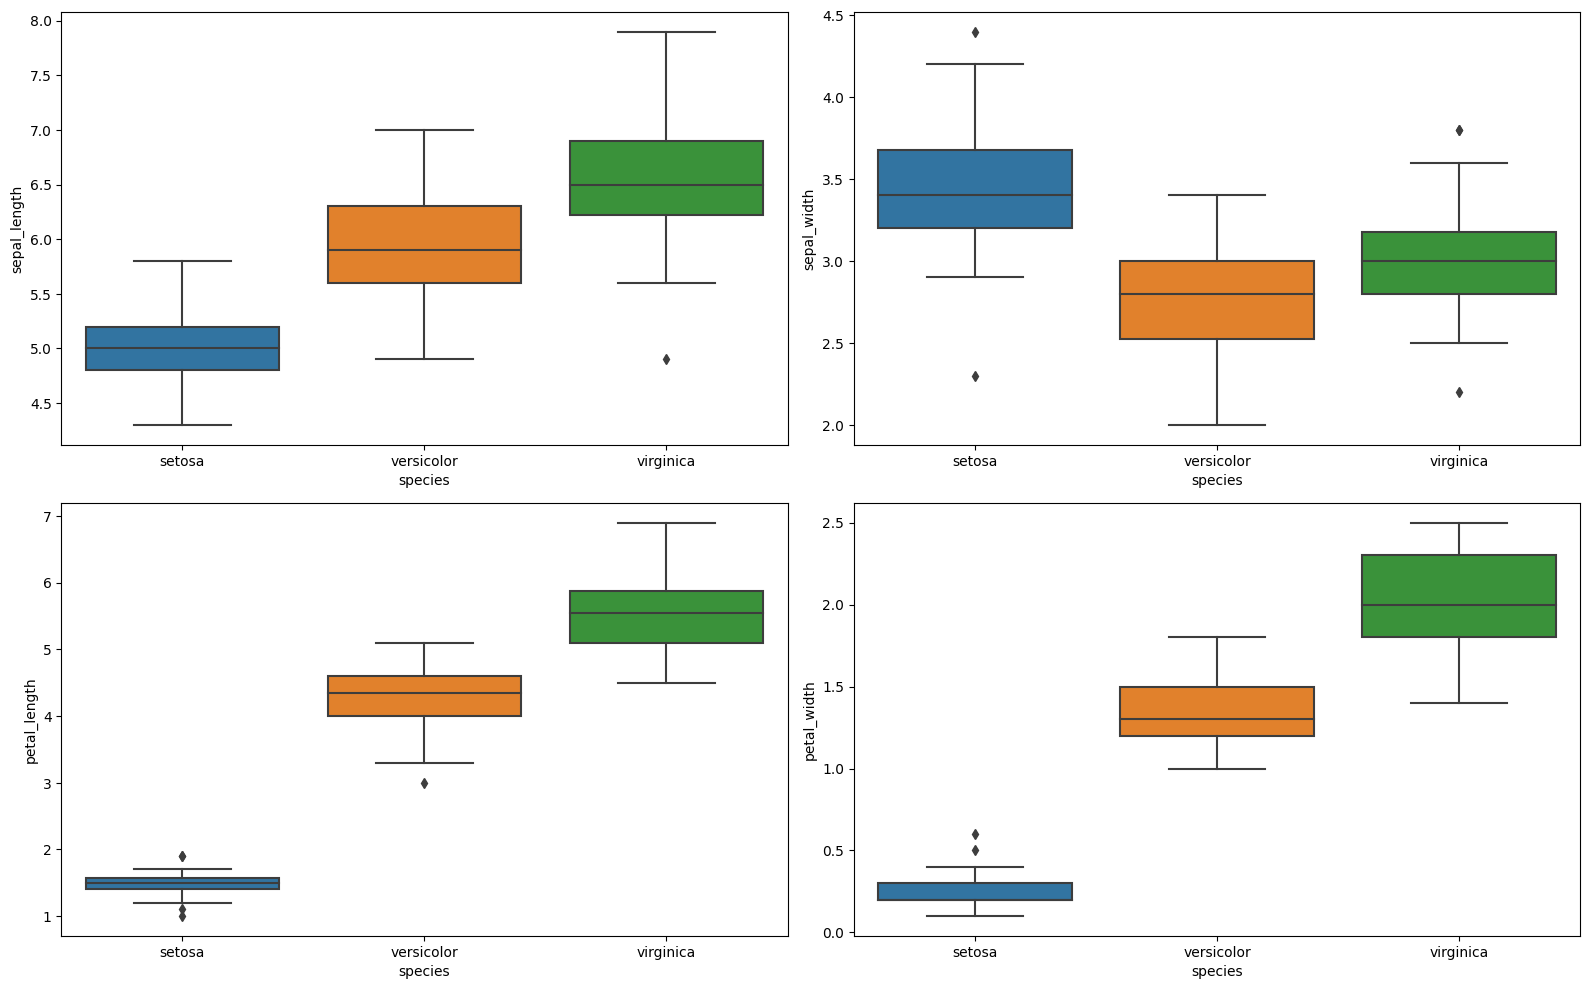

In [29]:
#Analyse des relations entre les variables et la variété de fleur

# Création des boxplots pour chaque variable en fonction de l'espèce de la fleur
fig,ax = plt.subplots(nrows = 2, ncols=2, figsize=(16,10))
row = 0
col = 0
for i in range(len(iris.columns) -1):
    if col > 1:
        row += 1
        col = 0
    axes = ax[row,col]
    sns.boxplot(x = iris['species'], y = iris[iris.columns[i]],ax = axes)
    col += 1
plt.tight_layout()
# plt.title("Individual Features by Class")
plt.show()

Bien que les graphiques renforcent des intuitions, il est nécessaire de réaliser un test statistique. En l'occurence, nous allons réaliser un test de Kruscal-Wallis, puisque la normalité n'est pas vérifiée pour deux variables.

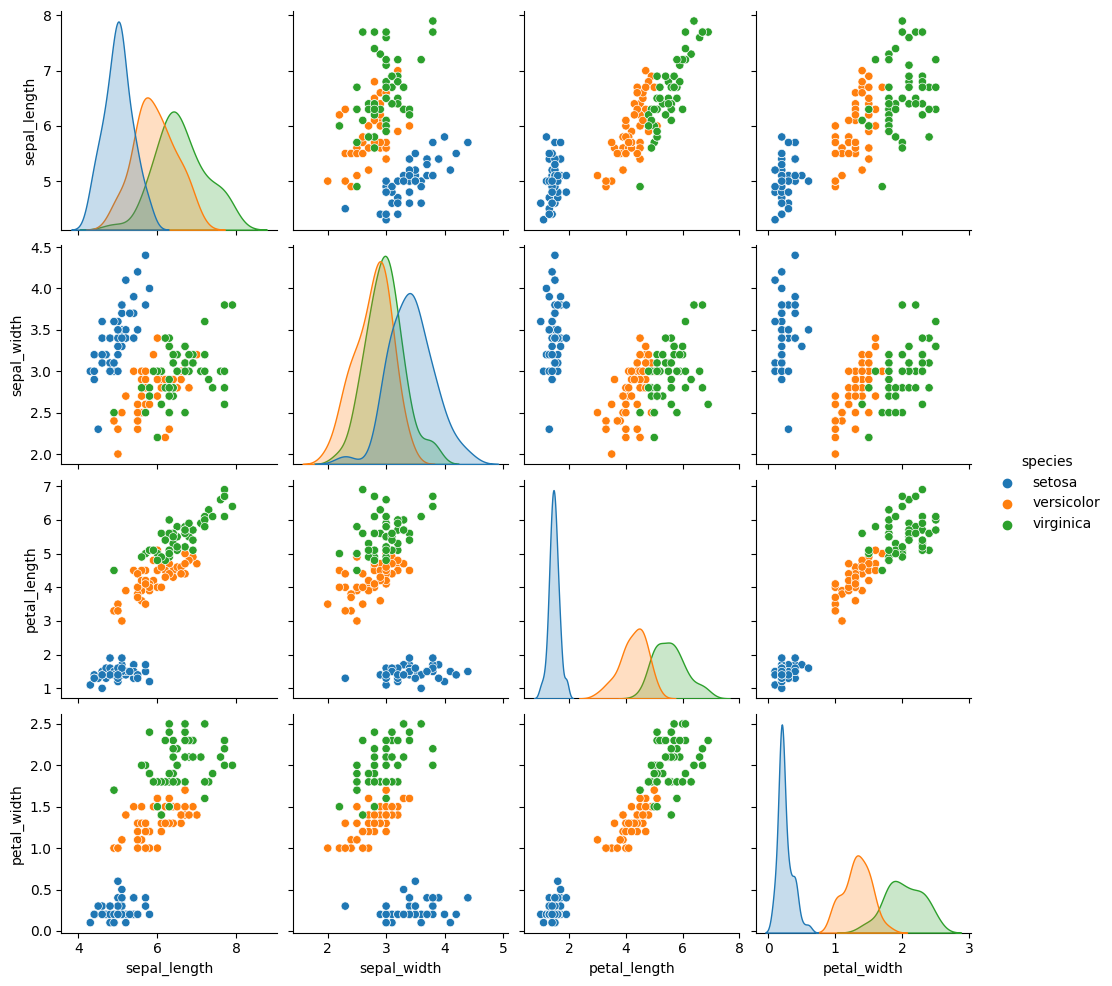

In [31]:
# pairplot

p=sns.pairplot(iris, hue = 'species')

In [32]:
# Confirmation des liaison avec un test de Kruskal-Wallis pour chaque variable

for column in iris.columns[:-1]:
    _, p_value = stats.kruskal(*[iris[column][iris.species == variety] for variety in iris.species.unique()])
    if p_value < 0.05:
        print(f"La variable {column} est significativement différente entre les espèces (p-value={p_value})")
    else:
        print(f"La variable {column} n'est pas significativement différente entre les espèces (p-value={p_value})")

La variable sepal_length est significativement différente entre les espèces (p-value=8.91873433246198e-22)
La variable sepal_width est significativement différente entre les espèces (p-value=1.5692820940316782e-14)
La variable petal_length est significativement différente entre les espèces (p-value=4.803973591157605e-29)
La variable petal_width est significativement différente entre les espèces (p-value=3.261795552421968e-29)


On peut également enchaîner avec un V de Cramer pour mesurer l'intensité des relations. Mais on va faire que de l'ACP.

## Analyse multivariée avec l'ACP

Après une partie descriptive des données pour bien les comprendre, on va recourir à l'ACP. 
L'ACP s'effectue uniquement sur des données quantitatives.

## Construction de l'ACP

In [34]:
# Importation des packages
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [33]:
# Séparation des données en variables explicatives (X) et variable qualitative (Y)
X = iris.iloc[:, :-1].values ## Variable explicative
y = iris.iloc[:, -1].values ## Type de fleurs

In [35]:
# Standardisation des données
# Normaliser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) ## .fit_transform() applique scaler sur x.


In [37]:
# Réduction de dimension
pca = PCA()
X_pca=pca.fit_transform(X)
X_pca

array([[-2.68412563e+00,  3.19397247e-01, -2.79148276e-02,
        -2.26243707e-03],
       [-2.71414169e+00, -1.77001225e-01, -2.10464272e-01,
        -9.90265503e-02],
       [-2.88899057e+00, -1.44949426e-01,  1.79002563e-02,
        -1.99683897e-02],
       [-2.74534286e+00, -3.18298979e-01,  3.15593736e-02,
         7.55758166e-02],
       [-2.72871654e+00,  3.26754513e-01,  9.00792406e-02,
         6.12585926e-02],
       [-2.28085963e+00,  7.41330449e-01,  1.68677658e-01,
         2.42008576e-02],
       [-2.82053775e+00, -8.94613845e-02,  2.57892158e-01,
         4.81431065e-02],
       [-2.62614497e+00,  1.63384960e-01, -2.18793179e-02,
         4.52978706e-02],
       [-2.88638273e+00, -5.78311754e-01,  2.07595703e-02,
         2.67447358e-02],
       [-2.67275580e+00, -1.13774246e-01, -1.97632725e-01,
         5.62954013e-02],
       [-2.50694709e+00,  6.45068899e-01, -7.53180094e-02,
         1.50199245e-02],
       [-2.61275523e+00,  1.47299392e-02,  1.02150260e-01,
      

## Aide à l'interprétation

### Choix du nombre d'axe

On fait un screeplot: x=facteur, y=pourcentage variance expliqué par chaque axe factoriel.

In [21]:
# Analyse des valeurs propres
## On réalise le screeplot 
comp = pd.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(4)], 
        "Valeur propre" : pca.explained_variance_,
        "% variance expliquée" : np.round(pca.explained_variance_ratio_ * 100),
        "% cum. var. expliquée" : np.round(np.cumsum(pca.explained_variance_ratio_) * 100)
    },
    columns = ["Dimension", "Valeur propre", "% variance expliquée", "% cum. var. expliquée"]
)
comp

,Dimension,Valeur propre,% variance expliquée,% cum. var. expliquée
0,Dim1,4.228242,92.0,92.0
1,Dim2,0.242671,5.0,98.0
2,Dim3,0.078210,2.0,99.0
3,Dim4,0.023835,1.0,100.0


Les premiers axes factoriels expliquent le plus de la variance (variance expliquée).

Text(3.25, 26, '25%')

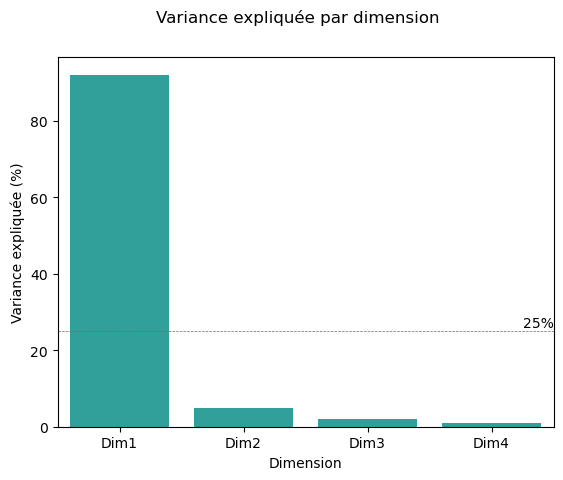

In [22]:
# Scree plot pour choisir le nombre de composantes principales
g_comp = sns.barplot(x = "Dimension", 
                     y = "% variance expliquée",
                     palette = ["lightseagreen"],
                     data = comp)
g_comp.set(ylabel = "Variance expliquée (%)")
g_comp.figure.suptitle("Variance expliquée par dimension")
plt.axhline(y = 25, linewidth = .5, color = "dimgray", linestyle = "--") # 25 = 100 / 4 (nb dimensions)
plt.text(3.25, 26, "25%")


Les dimensions 1 et 2 expliquent environ 80% de la variance. On prendra donc ces deux dimensions.

### Autres aide à l'interprétation

##### Qualité de représentation des variables et contribution à la formation des axes

Lors de l'analyse en composantes principales (ACP), il est important de mesurer la qualité de représentation des variables sur les axes principaux et leur contribution à la formation de ces axes.

**Qualité de représentation des variables (cosinus carré)**

La qualité de représentation des variables est souvent mesurée à l'aide du carré du cosinus de l'angle entre les vecteurs représentant les variables et les axes principaux. Le cosinus carré est également appelé **cos2**. Pour une variable donnée, la somme des cos2 sur tous les axes principaux est égale à 1.

La formule pour calculer le cos2 pour une variable `i` sur un axe principal `k` est la suivante :

$$
\text{cos}^2(i, k) = \frac{\text{coord}(i, k)^2}{\lVert\text{coord}(i)\rVert^2}
$$


ooù $\text{coord}(i, k)$ est la coordonnée de la variable `i` sur l'axe principal `k`.


**Un seuil couramment utilisé pour interpréter la qualité de représentation des variables est 0,5**. Si le cos2 d'une variable est supérieur à 0,5 sur un axe principal, cela signifie que cet axe représente bien la variable.

**Contribution des variables à la formation des axes (CTR)**

La contribution des variables à la formation des axes indique l'importance relative de chaque variable pour expliquer la variabilité des données sur un axe principal donné. Cette contribution est souvent exprimée en pourcentage et est calculée à l'aide de la formule suivante :

$$
\text{CTR}(i, k) = \frac{\text{coord}(i, k)^2}{n \cdot \lambda_k}
$$


où :
- $\text{coord}(i, k)$ est la coordonnée de la variable `i` sur l'axe principal `k`
- $n$ est le nombre total de variables
- $\lambda_k$ est la valeur propre associée à l'axe principal `k`


Il est important de noter que la somme des contributions des variables sur un axe principal donné est égale à 100 %.

En interprétant les contributions des variable  à la formation des axes, **il est courant de considérer les variables ayant une contribution supérieure à la contribution moyenne (100 % / nombre de variables)** comme étant importantes pour la formation de l'axe principal considéré.

In [23]:
# Calcul du cosinus carré des variables
cos_squared = np.square(pca.components_)

# Création d'un dataframe pandas avec le cosinus carré des variables
df_cos_squared = pd.DataFrame(cos_squared, columns=['PC{}'.format(i+1) for i in range(X.shape[1])])
df_cos_squared.index = iris.columns[:-1]

print(df_cos_squared)

                   PC1       PC2       PC3       PC4
sepal.length  0.130600  0.007144  0.733885  0.128371
sepal.width   0.431109  0.533136  0.030058  0.005697
petal.length  0.338759  0.357497  0.005812  0.297932
petal.width   0.099532  0.102223  0.230245  0.568000


In [24]:
# Contribution à la formation de l'axe
# Obtenir les composantes principales
components = pca.components_

n_components = X.shape[1]
feature_names=iris.columns[0:4]
# Calculer la contribution des variables à la formation des axes
loadings = pca.components_.T
eigenvalues = pca.explained_variance_
variable_contributions = (loadings**2) * eigenvalues

# Créer un DataFrame pour faciliter l'affichage des résultats
column_names = [f'PC{i+1}_contrib' for i in range(n_components)]
variable_contrib_df = pd.DataFrame(variable_contributions, columns=column_names, index=feature_names)

print(variable_contrib_df)

              PC1_contrib  PC2_contrib  PC3_contrib  PC4_contrib
sepal.length     0.552210     0.104617     0.026494     0.002372
sepal.width      0.030207     0.129376     0.027960     0.002436
petal.length     3.103041     0.007294     0.000455     0.005488
petal.width      0.542784     0.001383     0.023301     0.013538


In [25]:
# Calculer la contribution des variables à la formation des axes
loadings = pca.components_.T
eigenvalues = pca.explained_variance_
variable_contributions = (loadings**2) * eigenvalues

# Convertir les contributions en pourcentage
variable_contrib_percent = variable_contributions / eigenvalues * 100

# Créer un DataFrame pour faciliter l'affichage des résultats
column_names = [f'PC{i+1}_contrib' for i in range(n_components)]
variable_contrib_df = pd.DataFrame(variable_contrib_percent, columns=column_names, index=feature_names)

print(variable_contrib_df)

              PC1_contrib  PC2_contrib  PC3_contrib  PC4_contrib
sepal.length    13.060027    43.110881    33.875875     9.953217
sepal.width      0.714406    53.313572    35.749736    10.222286
petal.length    73.388453     3.005808     0.581194    23.024545
petal.width     12.837115     0.569738    29.793195    56.799951


#### Qualité de représentation des individus et contribution à la formation des axes

Lors de l'analyse en composantes principales (ACP), il est important de mesurer la qualité de représentation des individus sur les axes principaux et leur contribution à la formation de ces axes.

**Qualité de représentation des individus (cosinus carré)**

La qualité de représentation des individus est souvent mesurée à l'aide du carré du cosinus de l'angle entre les vecteurs représentant les individus et les axes principaux. Le cosinus carré est également appelé **cos²**. Pour un individu donné, la somme des cos² sur tous les axes principaux est égale à 1.

La formule pour calculer le cos² pour un individu `i` sur un axe principal `k` est la suivante :

$$
\text{cos}^2(i, k) = \frac{\text{coord}(i, k)^2}{\lVert\text{coord}(i)\rVert^2}
$$

où $\text{coord}(i, k)$ est la coordonnée de l'individu `i` sur l'axe principal `k`.

Un seuil couramment utilisé pour interpréter la qualité de représentation des individus est 0,5. Si le cos² d'un individu est supérieur à 0,5 sur un axe principal, cela signifie que cet axe représente bien l'individu.

**Contribution des individus à la formation des axes (CTR)**

La contribution des individus à la formation des axes indique l'importance relative de chaque individu pour expliquer la variabilité des données sur un axe principal donné. Cette contribution est souvent exprimée en pourcentage et est calculée à l'aide de la formule suivante :

$$
\text{CTR}(i, k) = \frac{\text{coord}(i, k)^2}{n \cdot \lambda_k}
$$

où :
- $\text{coord}(i, k)$ est la coordonnée de l'individu `i` sur l'axe principal `k`
- $n$ est le nombre total d'individus
- $\lambda_k$ est la valeur propre associée à l'axe principal `k`

Il est important de noter que la somme des contributions des individus sur un axe principal donné est égale à 100 %.

En interprétant les contributions des individus à la formation des axes, **il est courant de considérer les individus ayant une contribution supérieure à la contribution moyenne (100 % / nombre d'individus) comme étant importants pour la formation de l'axe principal considéré**.

In [26]:
# Calculer la contribution des individus à la formation des axes
eigenvalues = pca.explained_variance_
contributions = (X_pca**2) / (X_pca.shape[0] * eigenvalues)

# Convertir les contributions en pourcentage
contrib_percent = contributions * 100

# Créer un DataFrame pour faciliter l'affichage des résultats
column_names = [f'PC{i+1}_contrib' for i in range(n_components)]
contrib_df = pd.DataFrame(contrib_percent, columns=column_names)

print(contrib_df)

     PC1_contrib  PC2_contrib  PC3_contrib  PC4_contrib
0       1.135938     0.280255     0.006642     0.000143
1       1.161486     0.086068     0.377577     0.274281
2       1.315955     0.057720     0.002731     0.011153
3       1.188344     0.278331     0.008490     0.159756
4       1.173994     0.293315     0.069167     0.104961
..           ...          ...          ...          ...
145     0.595923     0.096615     0.269548     5.080547
146     0.367724     0.386979     0.126661     1.809735
147     0.490813     0.017084     0.145127     0.524978
148     0.569753     0.037368     4.458903     0.055625
149     0.304717     0.219494     1.122655     0.672313

[150 rows x 4 columns]


# Représentation graphique et interprétation

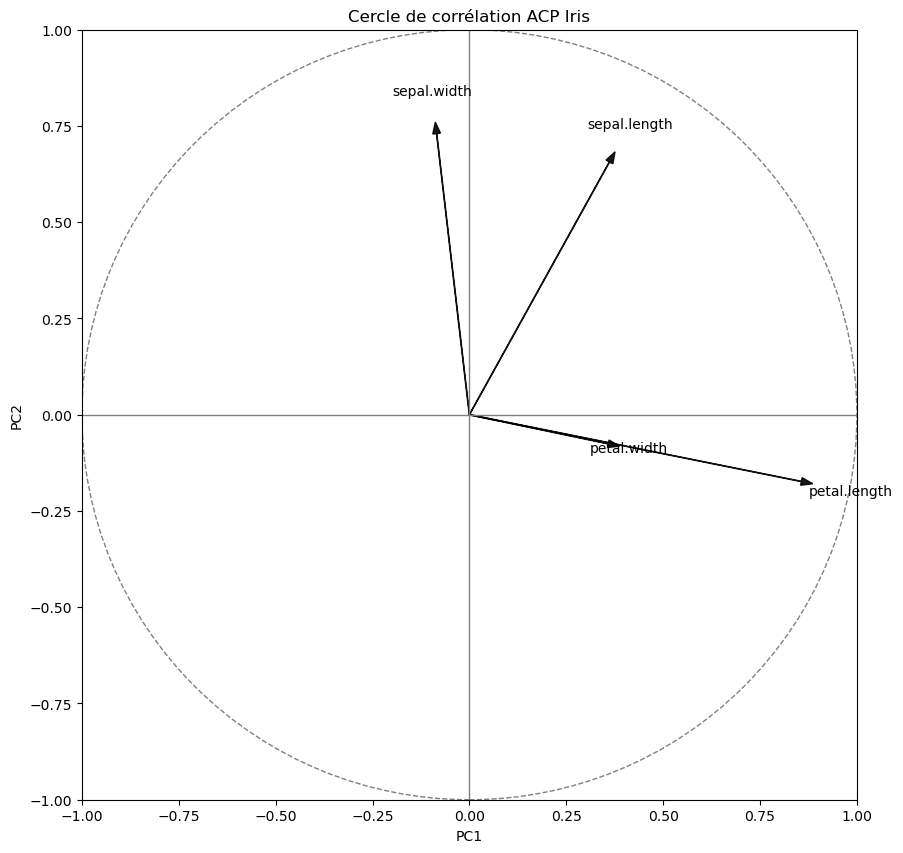

In [27]:
# Créer le cercle de corrélation
coeff = np.transpose(pca.components_[0:2, :])
n = coeff.shape[0]
xs = np.array([1, 0])
ys = np.array([0, 1])

# Créer la figure
plt.figure(figsize=(10, 10))

# Placer les vecteurs des variables
for i in range(n):
    plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='k', alpha=0.9, head_width=0.02)
    plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, feature_names[i], color='k', ha='center', va='center')

# Placer le cercle unitaire
circle = plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='--')
plt.gca().add_artist(circle)

# Ajuster les limites et les axes
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.axhline(0, color='gray', linewidth=1)
plt.axvline(0, color='gray', linewidth=1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Cercle de corrélation ACP Iris')

# Afficher la figure
plt.show()


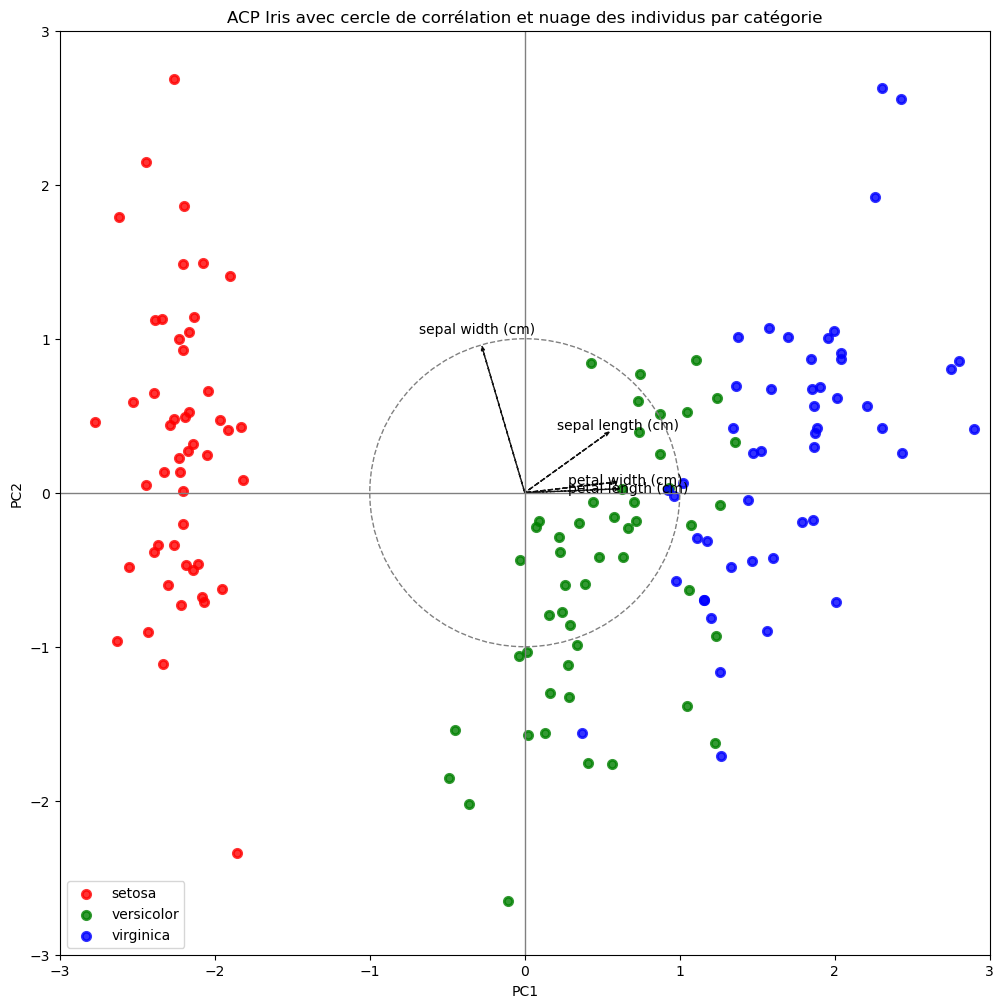

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

# Charger les données Iris
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Normaliser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Appliquer l'ACP
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Créer le cercle de corrélation
coeff = np.transpose(pca.components_[0:2, :])
n = coeff.shape[0]

# Créer la figure
fig, ax = plt.subplots(figsize=(12, 12))

# Visualiser les catégories d'espèces avec les couleurs
colors = ['r', 'g', 'b']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, alpha=.8, lw=lw, label=target_name)

# Placer les vecteurs des variables
for i in range(n):
    plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='k', alpha=0.9, head_width=0.02, linestyle='--')
    plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, iris.feature_names[i], color='k', ha='center', va='center')

# Placer le cercle unitaire
circle = plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='--')
plt.gca().add_artist(circle)

# Ajuster les limites et les axes
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.axhline(0, color='gray', linewidth=1)
plt.axvline(0, color='gray', linewidth=1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('ACP Iris avec cercle de corrélation et nuage des individus par catégorie')

# Afficher la légende
plt.legend(loc='best', shadow=False, scatterpoints=1)

# Afficher la figure
plt.show()